# Markov Inequality
* P(X>a)<E(X)/a if X positive R.V. and a>0.


E(X) 5.0


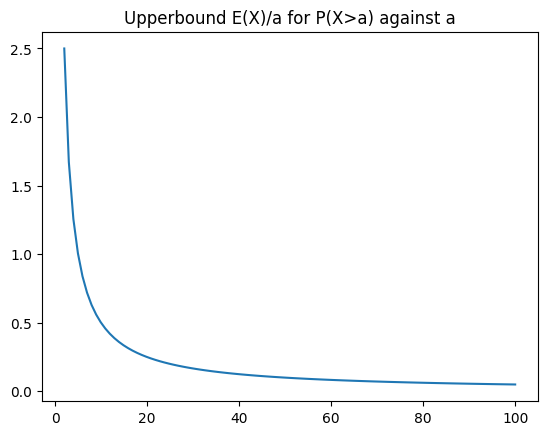

In [23]:
# P(X>a)<E(X)/a if X positive R.V. and a>0.

n = 10
p = 0.5
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
X = binom(n, p)
def P(X,a):
    return 1-X.cdf(a)

for a in np.linspace(1,100,100):
    if P(X,a)<X.mean()/a == False:
        print('!')
    
bounds = [X.mean()/a for a in np.linspace(2,100,100)]
plt.plot(np.linspace(2,100,100), bounds)
print('E(X)', n*p)
plt.title('Upperbound E(X)/a for P(X>a) against a')

# Monte Carlo Experiment
μ = 10
σ = 1
for a in np.linspace(μ-2*σ,μ+2*σ,100):
    for i in range(100):
        x = np.random.normal(μ, σ, 100)
        p = np.mean(np.where(x>a, 1, 0))
        if p > μ/a == False:
            print("Error")

In [34]:
# Monte Carlo Experiment
# P(X>a)<E(X)/a if X>0.

μ = 10
σ = 1
for a in np.linspace(μ-2*σ,μ+2*σ,100):
    for i in range(100):
        x = np.random.normal(μ, σ, 100)
        p = np.mean(np.where(x>a, 1, 0))
        if (p < μ/a) == False:
            print("Error")

# Hoeffding Inequality

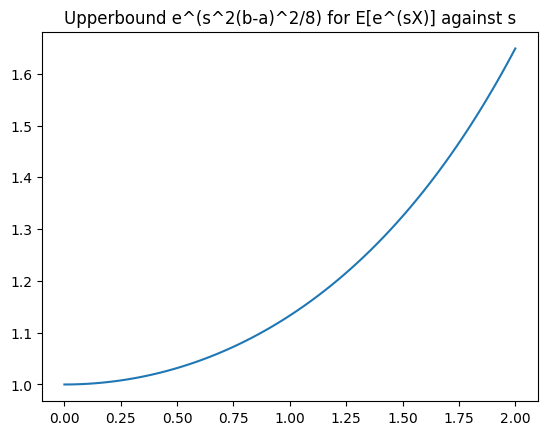

In [37]:
#### Hoeffding Inequality
# X in [a,b]
# E(exp(sX)] < exp(s^2 (b-a)^2 / 8)

a = 5
b = 6
from scipy.stats import uniform
X = uniform(a, b)

def ub(s, a, b):
    return np.exp((s**2)* ((b-a) ** 2) * 1/8)

bounds = [ub(s, a, b) for s in np.linspace(0, 2, 100)]
plt.plot(np.linspace(0, 2, 100), bounds)
plt.title('Upperbound e^(s^2(b-a)^2/8) for E[e^(sX)] against s')

# monte carlo
for s in np.linspace(μ-2*σ,μ+2*σ,100):
    for i in range(100):
        x = np.random.beta(1, 1, 100)
        LHS = np.mean(np.exp(s*x))
        RHS = np.exp(s**2/8)
        if (LHS < RHS) == False:
            print("Error")

# Chernoff-Hoeffding

Text(0.5, 1.0, 'Upperbound e^(s^2(b-a)^2/8) for E[e^(sX)] against s')

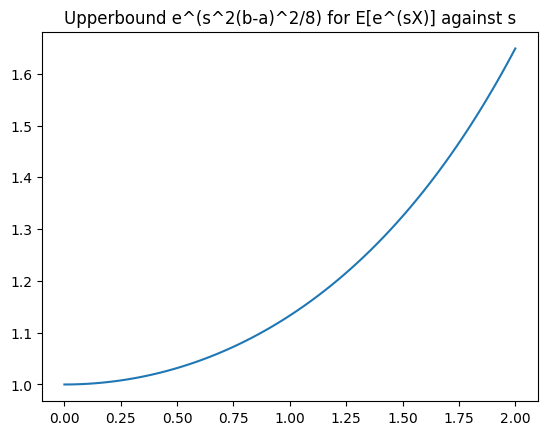

In [40]:
# P[sum_{n}(X_{i}-μ) > ϵ] < 2exp(-2ϵ^2/n)



In [71]:
α = 1
β = 1
μ = α/(α+β)
ϵ = 0.01
N = 100

def RHS(ϵ, n):
    return 2*np.exp(-2*(ϵ**2)/n)

bounds = []
sums = []
for n in range(1, 1000):
    x = np.random.beta(α,β,n)
    p = np.mean(np.where(np.abs(np.sum(x-μ))>ϵ, 1, 0))
    ub = RHS(ϵ, n)
    sums.append(np.abs(np.sum(x-μ)))
    bounds.append(ub)

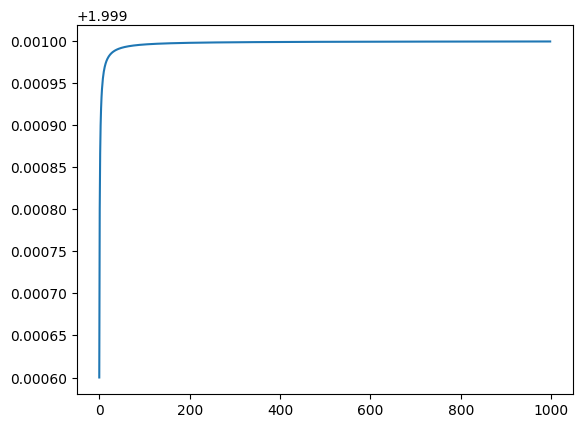

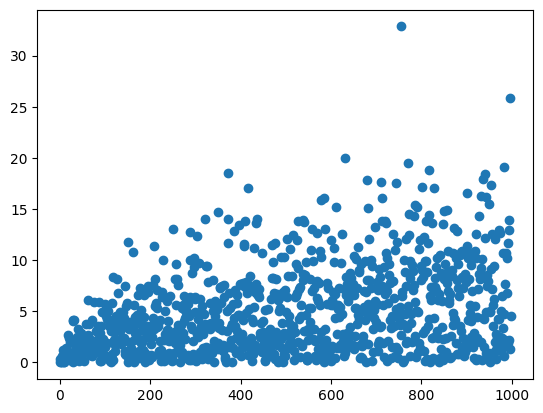

In [72]:
plt.plot(bounds)
plt.show()
plt.scatter(range(len(sums)), sums)
plt.show()